# Books Read in 2022

## Prep
Imports and set variables

In [2]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.style as style
%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [5]:
style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
YEAR = 2022
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

Go to https://www.goodreads.com/review/import and click "Export Library". Rename to **books.csv**.

In [96]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [171]:
books.loc[books['Title'].str.startswith('The Ghost Map'), 'Date Read'] = '12/21/2019'
books.loc[books['Title'].str.startswith('Exhalation'), 'Date Read'] = '10/16/2019'
books.loc[books['Title'].str.startswith('Why We Sleep'), 'Date Read'] = '12/8/2019'
books.loc[books['Title'].str.startswith('High Fidelity'), 'Date Read'] = '4/21/2020'
books.loc[books['Title'].str.startswith('The Ocean at the End of the Lane'), 'Date Read'] = '4/21/2020'
books.loc[books['Title'].str.startswith('Conscious'), 'Original Publication Year'] = 2019
books.loc[books['Title'].str.startswith('The Forgetting Machine'), 'Original Publication Year'] = 2017
books.loc[books['Title'].str.startswith('A Series of Fortunate Events'), 'Original Publication Year'] = 2020
books.loc[books['Title'] == 'Chances Are . . .', 'Title'] = 'Chances Are...'
books.loc[books['Title'].str.startswith('My Ex-Life'), 'Date Read'] = '11/19/2021'
books.loc[books['Title'].str.startswith('Forgetting Machine'), 'Title'] = "The Forgetting Machine: Memory, Perception, and the 'Jennifer Aniston Neuron'"
books.loc[books['Title'].str.startswith('Summer for the Gods'), "Number of Pages"] = 356
books.loc[books['Title'].str.startswith('The Devil in the White City'), "Number of Pages"] = 447
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Add Start Dates to books. 

The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [172]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"{}",'.format(bk, JAN1))
print('}')

{
"What I Believe":"1/1/2022",
"Tomorrow, and Tomorrow, and Tomorrow":"1/1/2022",
"A Swim in a Pond in the Rain: In Which Four Russians Give a Master Class on Writing, Reading, and Life":"1/1/2022",
"The Bell Jar":"1/1/2022",
"Damascus Station":"1/1/2022",
"The Last Chairlift":"1/1/2022",
"Hell of a Book":"1/1/2022",
"Strong Motion":"1/1/2022",
"The Singer's Gun":"1/1/2022",
"No Country for Old Men":"1/1/2022",
"Aftermath: Life in the Fallout of the Third Reich":"1/1/2022",
"The Lola Quartet":"1/1/2022",
"Enemy of All Mankind: A True Story of Piracy, Power, and History's First Global Manhunt":"1/1/2022",
"Forget the Alamo: The Rise and Fall of an American Myth":"1/1/2022",
"Sea of Tranquility":"1/1/2022",
"The Seven Husbands of Evelyn Hugo":"1/1/2022",
"The Glass Hotel":"1/1/2022",
"The Lincoln Highway":"1/1/2022",
"Stony the Road: Reconstruction, White Supremacy, and the Rise of Jim Crow":"1/1/2022",
"East West Street: On the Origins of "Genocide" and "Crimes Against Humanity"":"1/1/2

Copy the above text and paste it below. Set it equal to **start_dates**. Replace the "1/1/YY" with the correct start dates. This is required because the start date is not in the downloaded CSV. It must be manually retrieved. This can be done by going to the Read list and via settings adding a column for Date Started. 

In [173]:
start_dates ={
"The Great Bridge: The Epic Story of the Building of the Brooklyn Bridge":"4/2/2022",
"Dispatches":"12/28/2021",
"The Devil in the White City":"1/28/2022",
"If Beale Street Could Talk":"5/4/2022",
"Thunderstruck":"5/4/2022",
"What I Believe":"12/30/2022",
"Reconstruction: America's Unfinished Revolution 1863-1877":"5/23/2022",
"The Fire Next Time":"5/4/2022",
"Strong Motion":"10/2/2022",
"The Singer's Gun":"9/27/2022",
"The Three-Body Problem (Remembrance of Earth’s Past, #1)":"3/17/2022",
"The Lola Quartet":"9/2/2022",
"The Billion Dollar Spy: A True Story of Cold War Espionage and Betrayal":"7/16/2022",
"The Bell Jar":"11/19/2022",
"The Seven Husbands of Evelyn Hugo":"7/30/2022",
"Wonderland: How Play Made the Modern World":"1/9/2022",
"Tenth of December":"6/3/2022",
"The Lost City of the Monkey God":"7/1/2022",
"Stony the Road: Reconstruction, White Supremacy, and the Rise of Jim Crow":"7/29/2022",
"How To: Absurd Scientific Advice for Common Real-World Problems":"4/29/2022",
"Nothing to See Here":"3/24/2022",
"The Glass Hotel":"7/30/2022",
"Seven and a Half Lessons About the Brain":"2/19/2022",
"The Vanishing Half":"3/6/2022",
"Enemy of All Mankind: A True Story of Piracy, Power, and History's First Global Manhunt":"8/29/2022",
"Aftermath: Life in the Fallout of the Third Reich":"9/13/2022",
"Fundamentals: Ten Keys to Reality":"6/18/2022",
"A Swim in a Pond in the Rain: In Which Four Russians Give a Master Class on Writing, Reading, and Life":"11/20/2022",
"The Midnight Library":"7/5/2022",
"Foregone":"7/14/2022",
"Punch Me Up to the Gods":"4/24/2022",
"Killers of the Flower Moon: The Osage Murders and the Birth of the FBI":"7/12/2022",
"This Is How They Tell Me the World Ends: The Cyberweapons Arms Race":"12/28/2021",
"The Final Revival of Opal & Nev":"5/21/2022",
"Harlem Shuffle":"6/5/2022",
"No Country for Old Men":"9/16/2022",
"Project Hail Mary":"2/21/2022",
"Forget the Alamo: The Rise and Fall of an American Myth":"8/17/2022",
"Hell of a Book":"10/20/2022",
"On Juneteenth":"5/23/2022",
"Shape: The Hidden Geometry of Information, Biology, Strategy, Democracy, and Everything Else":"2/22/2022",
"Damascus Station":"11/18/2022",
"The Bomber Mafia: A Dream, a Temptation, and the Longest Night of the Second World War":"1/23/2022",
"The Lincoln Highway":"7/29/2022",
"Bewilderment":"6/8/2022",
"The Hard Sell: Crime and Punishment at an Opioid Startup":"7/21/2022",
'East West Street: On the Origins of "Genocide" and "Crimes Against Humanity"':"7/22/2022",
"Sea of Tranquility":"8/2/2022",
"Summer for the Gods: The Scopes Trial and America's Continuing Debate Over Science and Religion":"5/8/2022",
"Tomorrow, and Tomorrow, and Tomorrow":"11/21/2022",
"Station Eleven":"5/27/2022",
"The Last Chairlift":"10/20/2022",
"The Scout Mindset: Why Some People See Things Clearly and Others Don't":"6/15/2022",
"Waging a Good War: A Military History of the Civil Rights Movement, 1954-1968":"10/25/2022",
}


Verify that you filled in all of the dates

In [174]:
all_updated = True
for t, d in start_dates.items():
    if d == JAN1:
        print('Unchanged: ', t)
        all_updated = False
if all_updated:
    print('All start dates have been updated.')

All start dates have been updated.


Populate the Date Started column.

In [175]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [176]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [177]:
date_columns = ['Date Read', 'Date Added', 
                'Date Started']
for c in date_columns:
    books[c] = pd.to_datetime(books[c])

In [178]:
books = books.dropna(subset=['Date Read', 'Date Started'], how='all')

In [179]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

Manual removal. This is where can manually remove books you do not want in the plots.

In [180]:
to_remove = [
        "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
    ]
books = books.drop(books[books.Title.isin(to_remove)].index)

In [181]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [182]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

Dispatches by Michael Herr (1977)
Wonderland: How Play Made the Modern World by Steven Johnson (2016)
This Is How They Tell Me the World Ends: The Cyberweapons Arms Race by Nicole Perlroth (2021)
The Devil in the White City by Erik Larson (2003)
Project Hail Mary by Andy Weir (2021)
Seven and a Half Lessons About the Brain by Lisa Feldman Barrett (2020)
The Vanishing Half by Brit Bennett (2020)
The Bomber Mafia: A Dream, a Temptation, and the Longest Night of the Second World War by Malcolm Gladwell (2021)
The Three-Body Problem (Remembrance of Earth’s Past, #1) by Liu Cixin (2006)
Shape: The Hidden Geometry of Information, Biology, Strategy, Democracy, and Everything Else by Jordan Ellenberg (2021)
The Great Bridge: The Epic Story of the Building of the Brooklyn Bridge by David McCullough (1972)
Punch Me Up to the Gods by Brian Broome (2021)
How To: Absurd Scientific Advice for Common Real-World Problems by Randall Munroe (2019)
Nothing to See Here by Kevin    Wilson (2019)
The Fire N

## Book Order for Covers
The book covers are ordered by finish date starting with the most recently finished.
Below is the order list (needed for `Cover Art Prep.ipynb`)

In [183]:
books[books.Finished == True].sort_values('Date Read', ascending=False).reset_index()['Title'].to_frame()

,Title
0,What I Believe
1,A Swim in a Pond in the Rain: In Which Four Ru...
2,Reconstruction: America's Unfinished Revolutio...
3,The Bell Jar
4,Damascus Station
5,"Tomorrow, and Tomorrow, and Tomorrow"
6,The Last Chairlift
7,Strong Motion
8,Hell of a Book
9,Aftermath: Life in the Fallout of the Third Reich


## Calculations
Calculate Time to Read

In [184]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [185]:
books['Pages per Day'] = (books['Number of Pages'] / 
                          [x.days for x in books['Time to Read']])

Create a short title for some of the plots.

In [186]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])
books['Title (short)'] = books['Title (short)'].str.replace(r" \(.*\)","",regex=True)

Sort books

In [187]:
books.sort_values(by='Date Started',ascending=False,inplace=True)

In [188]:
books[["Title", "Date Read", "Date Started"]]

,Title,Date Read,Date Started
161,What I Believe,2022-12-30,2022-12-30
820,"Tomorrow, and Tomorrow, and Tomorrow",2022-11-24,2022-11-21
770,A Swim in a Pond in the Rain: In Which Four Ru...,2022-12-30,2022-11-20
603,The Bell Jar,2022-12-18,2022-11-19
800,Damascus Station,2022-12-02,2022-11-18
827,The Last Chairlift,2022-11-06,2022-10-20
790,Hell of a Book,2022-10-20,2022-10-20
391,Strong Motion,2022-10-25,2022-10-02
525,The Singer's Gun,2022-10-02,2022-09-27
782,No Country for Old Men,2022-10-02,2022-09-16


## Some Stats

In [189]:
print(f"In total: {len(books[books['Finished'] == True])} books, {books.loc[books['Finished'] == True, 'Number of Pages'].sum():,.0f} pages.")
print(f"Avg: {books.loc[books['Finished'] == True, 'Number of Pages'].sum() / len(books[books['Finished'] == True]):,.0f} pages")

In total: 53 books, 18,611 pages.
Avg: 351 pages


## Plotting

In [190]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color, False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)
ylabel_colors = ['black' if f else 'gray' for f in books['Finished']]

### Books Across the Year

/var/folders/tb/3lm9_d455m9dd6yvc906dll99cffj5/T/ipykernel_46490/2320616281.py:43: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)


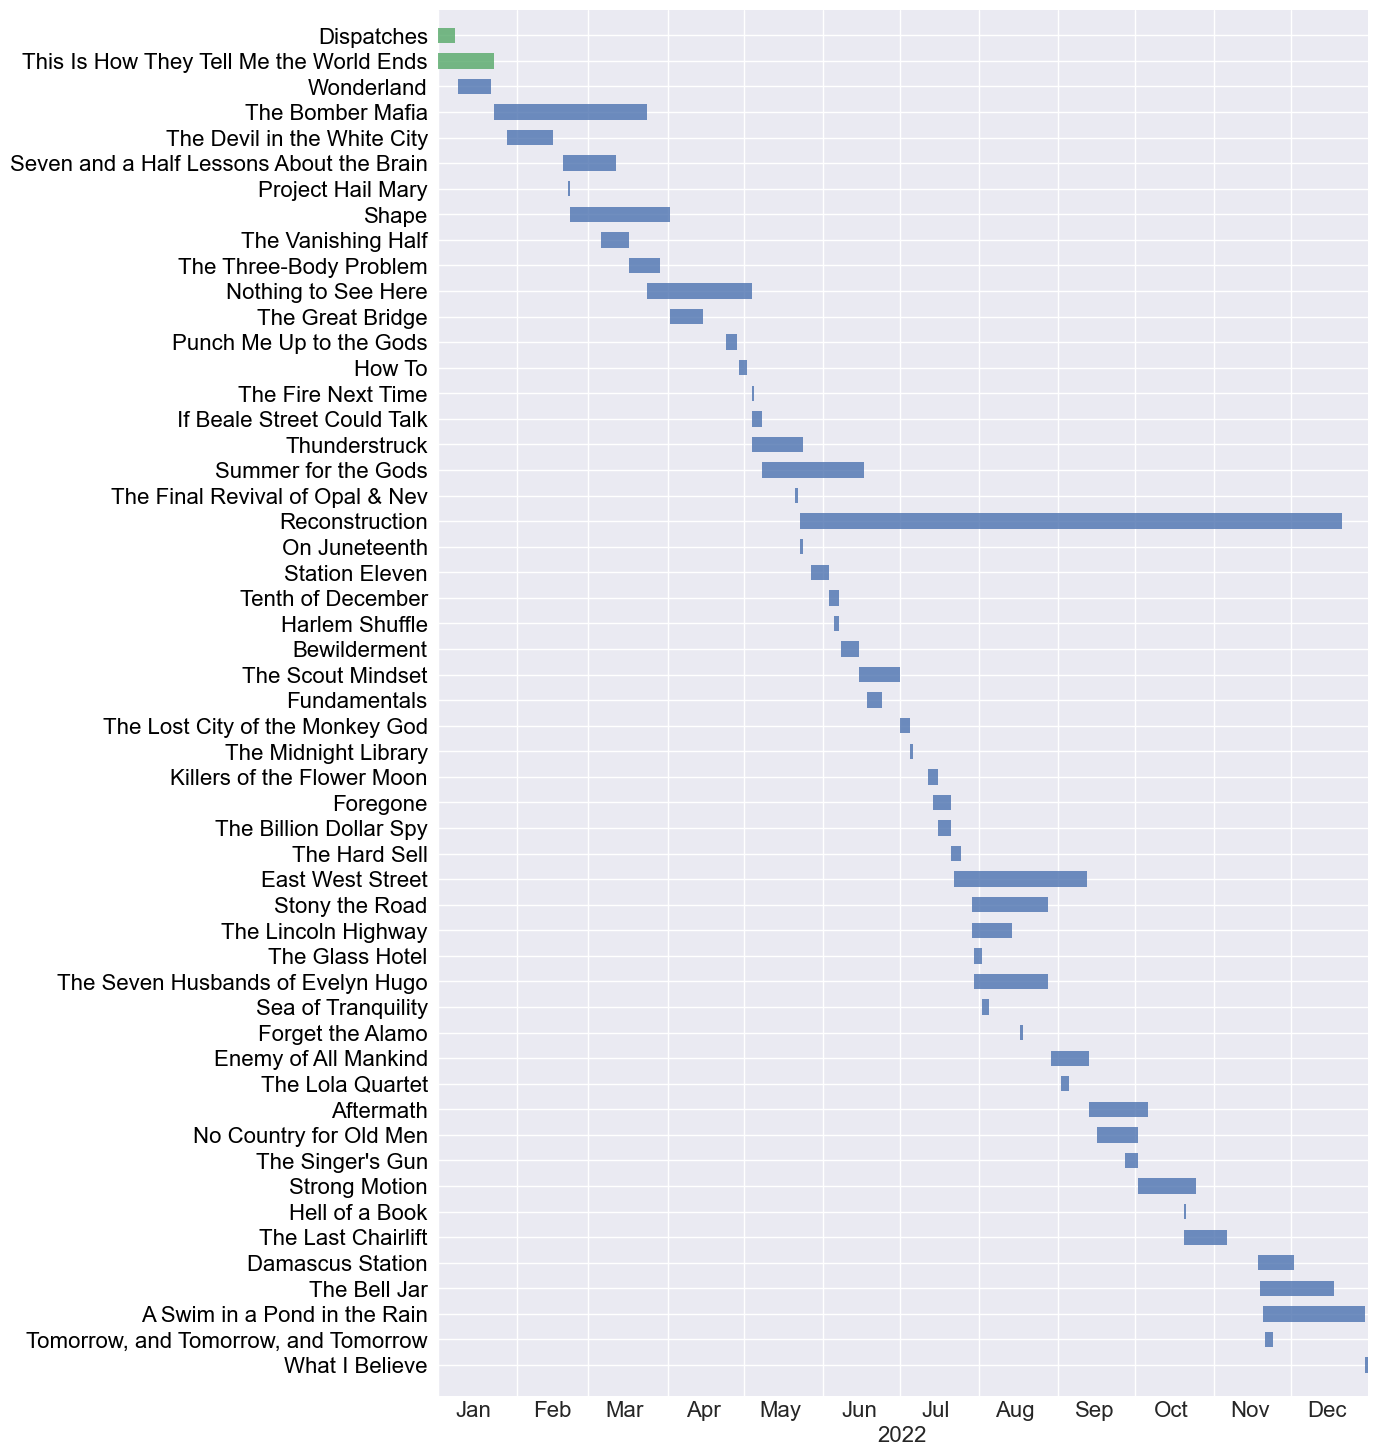

In [191]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,18))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, max(end_date - start_date, 1), label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos, ylabels)
plt.setp(labelsy, fontname="Arial", fontsize = 16)
ax.set_ylim(bottom=-0.1, top=ilen*0.5+0.5)
[t.set_color(c) for c, t in zip(ylabel_colors, ax.yaxis.get_ticklabels())]

ax.xaxis_date()
ax.set_xlim(left=_create_date(datetime.datetime(YEAR, 1, 1)),
           right=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# plt.title('{} Reading'.format(YEAR), fontname="Arial", fontsize=20)
plt.title(None)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 
    
plt.savefig('books_timeline_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Book Ratings

Average Personal Goodread Rating: 2.0
Average Site Goodread Rating: 4.060566037735849


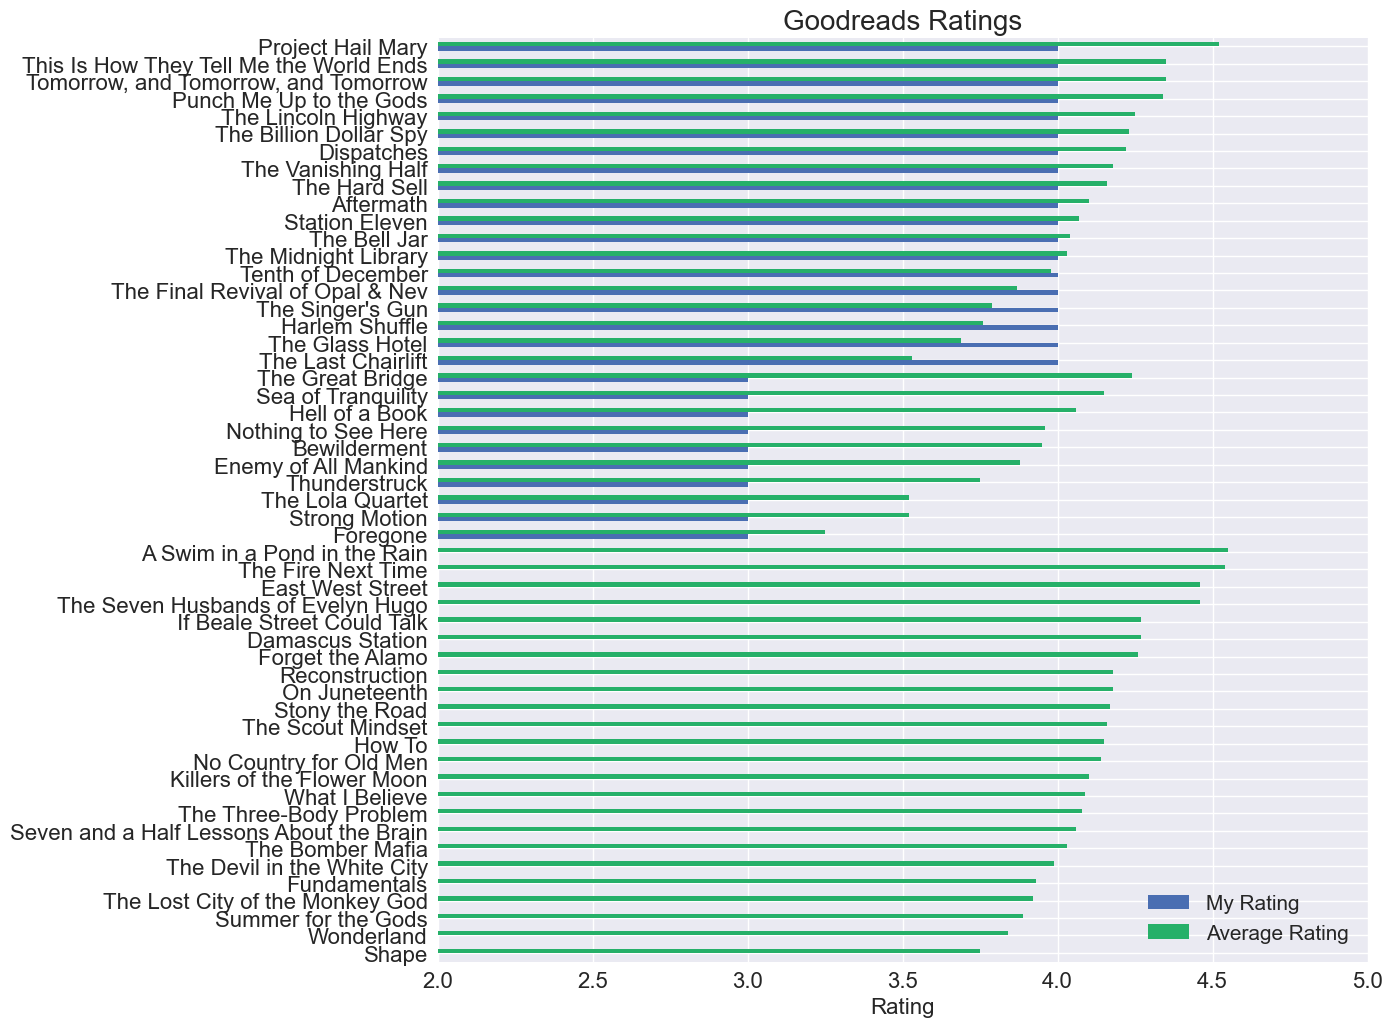

In [192]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating',
                                                                     'Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',
                                                 xlim=(2,5),
                                                 figsize=(12,12),
                                                 fontsize=16,
                                                 color=('#4A6EB2', '#26B069'))
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=16)
plt.title('Goodreads Ratings', fontsize=20);
mpl.rcParams['legend.fontsize'] = 'large'
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())
plt.legend(fontsize=15)

plt.savefig('ratings_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Number of Pages

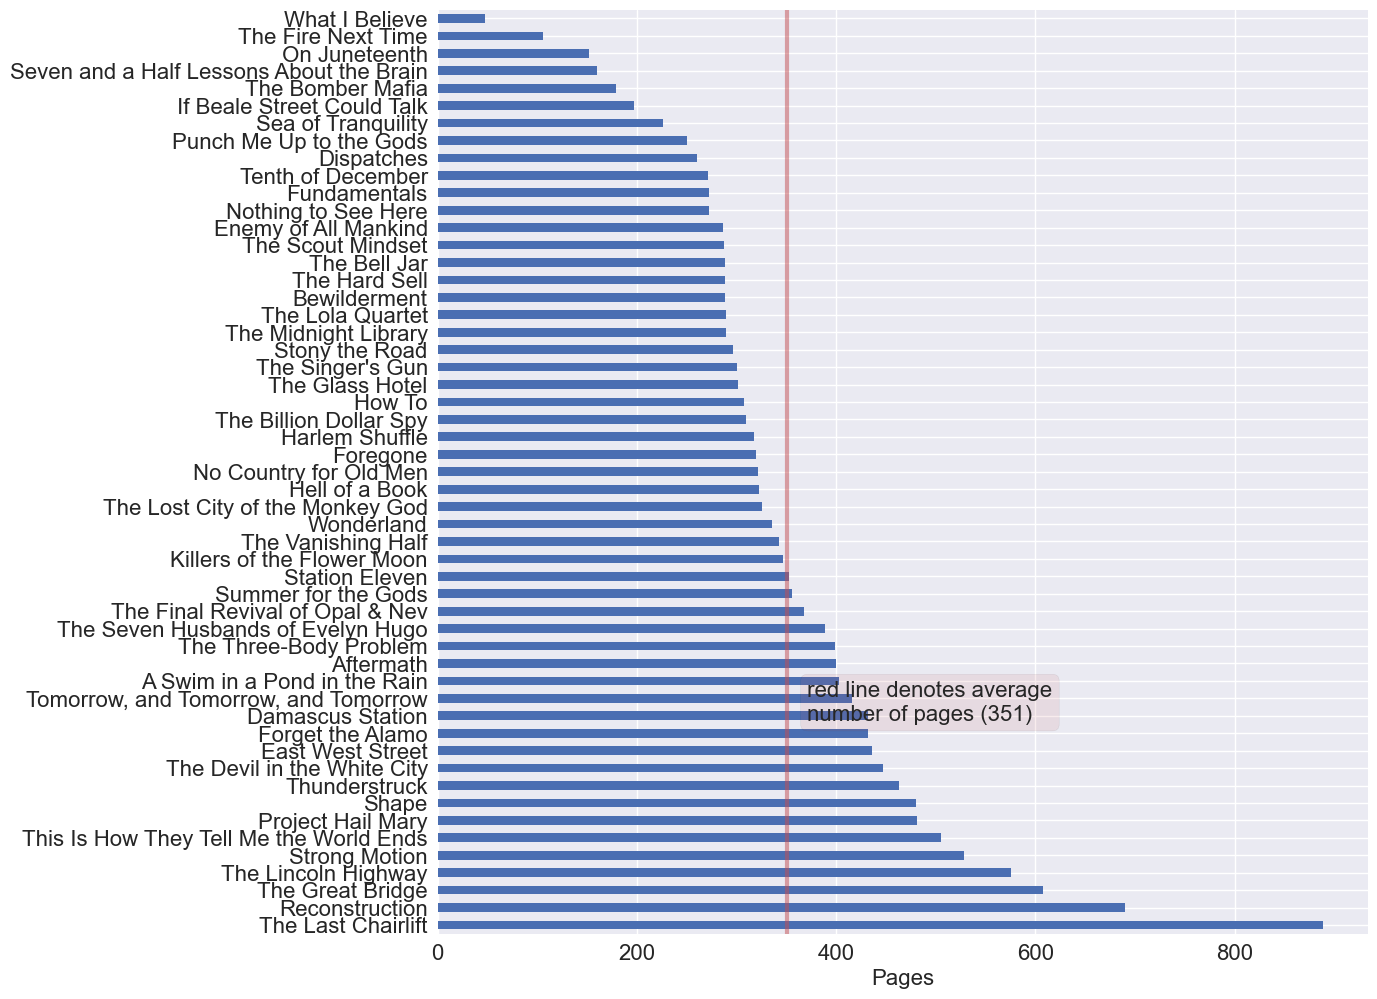

In [193]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                                 title='Number of Pages',
                                                                 figsize=(12,12),
                                                                 fontsize=16,
                                                                 color='#4A6EB2')
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 14, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontname="Arial", fontsize=16)
plt.xlabel('Pages', fontsize=16)
# plt.title('Number of Pages', fontname="Arial", fontsize=20)
plt.title(None)

plt.savefig('num_pages_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

In [194]:
print(f'This year you read {len(books_)} books with a total page count of {books_["Number of Pages"].sum():,.0f} and and average ' +
      f'number of pages of {books_["Number of Pages"].mean():,.1f} per book.')

This year you read 53 books with a total page count of 18,611 and and average number of pages of 351.2 per book.


/var/folders/tb/3lm9_d455m9dd6yvc906dll99cffj5/T/ipykernel_46490/4222668126.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);


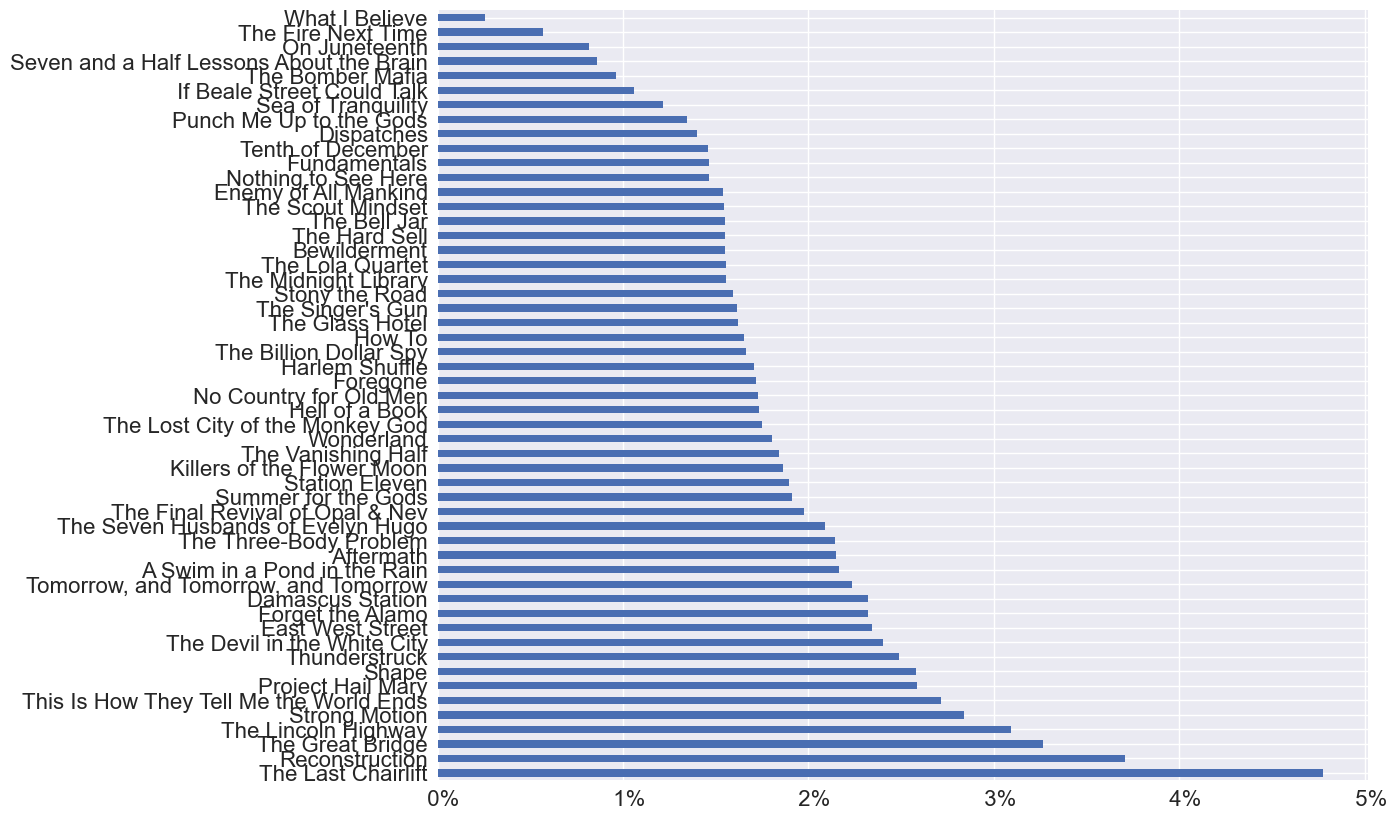

In [195]:
# Note: if the UserWarning is explained here 
# https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

books_ = books[books['Finished'] == True]

books_.loc[:, 'Percent'] = books_['Number of Pages'] / books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh', 
                                                         figsize=(12,10),
                                                         fontsize=16,
                                                         color='#4A6EB2')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 50.989041095890414


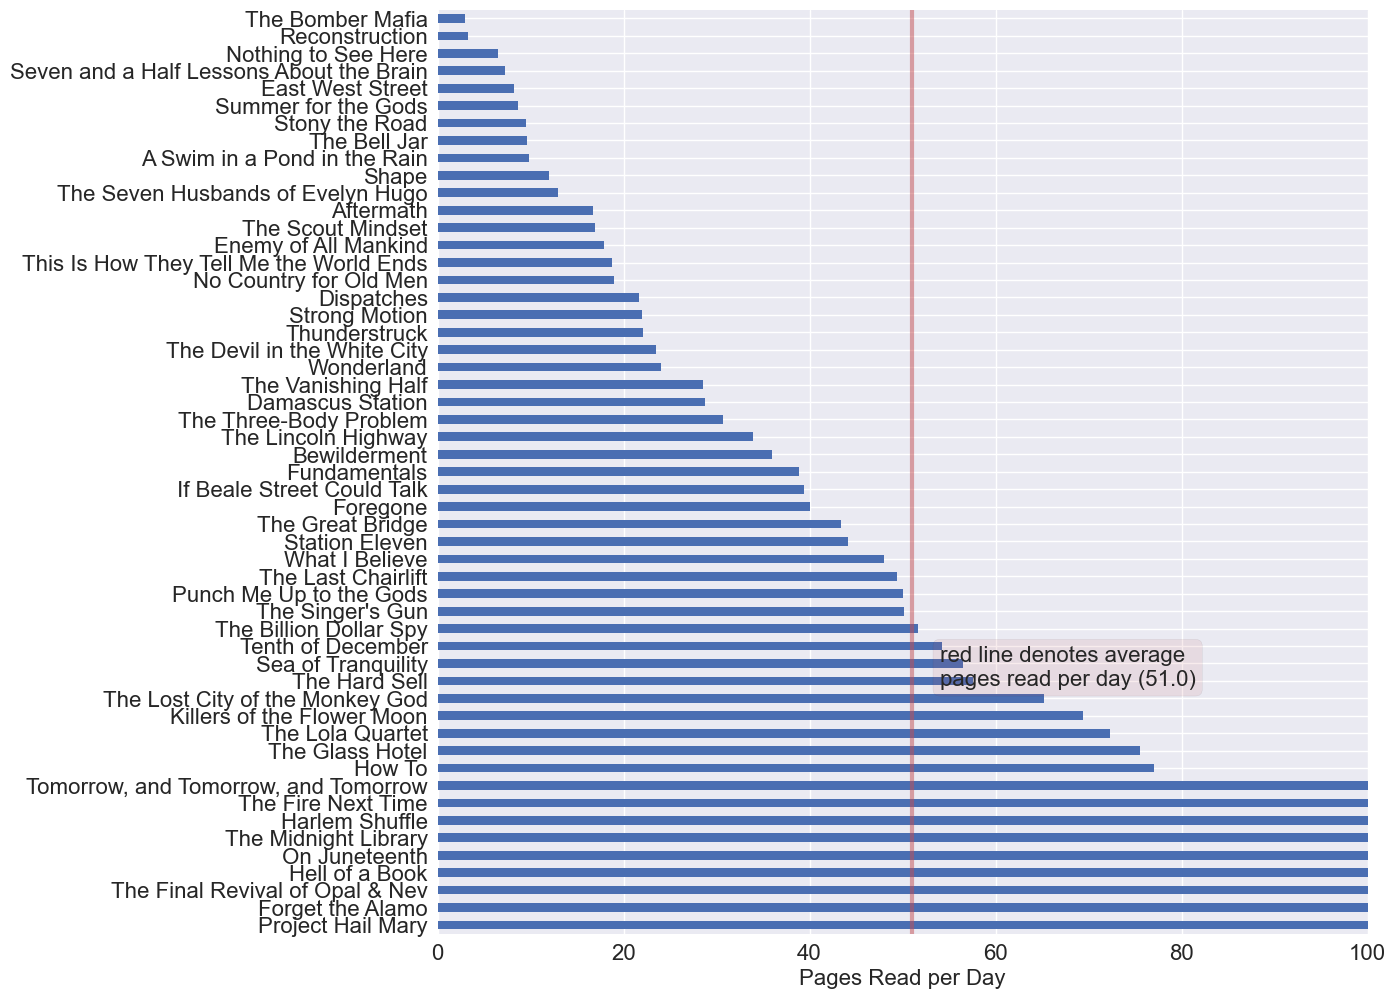

In [196]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),
                                                               figsize=(12,12),
                                                               fontsize=16,
                                                               color='#4A6EB2')
ax.yaxis.label.set_visible(False)
# plt.title('Reading Rate: Pages Read per Day', fontsize=20)
plt.title(None)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 16, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
ax.set_xlabel('Pages Read per Day', fontsize=16)
print ('Average Number of Pages over Year:',avg)

plt.savefig('pages_per_day_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

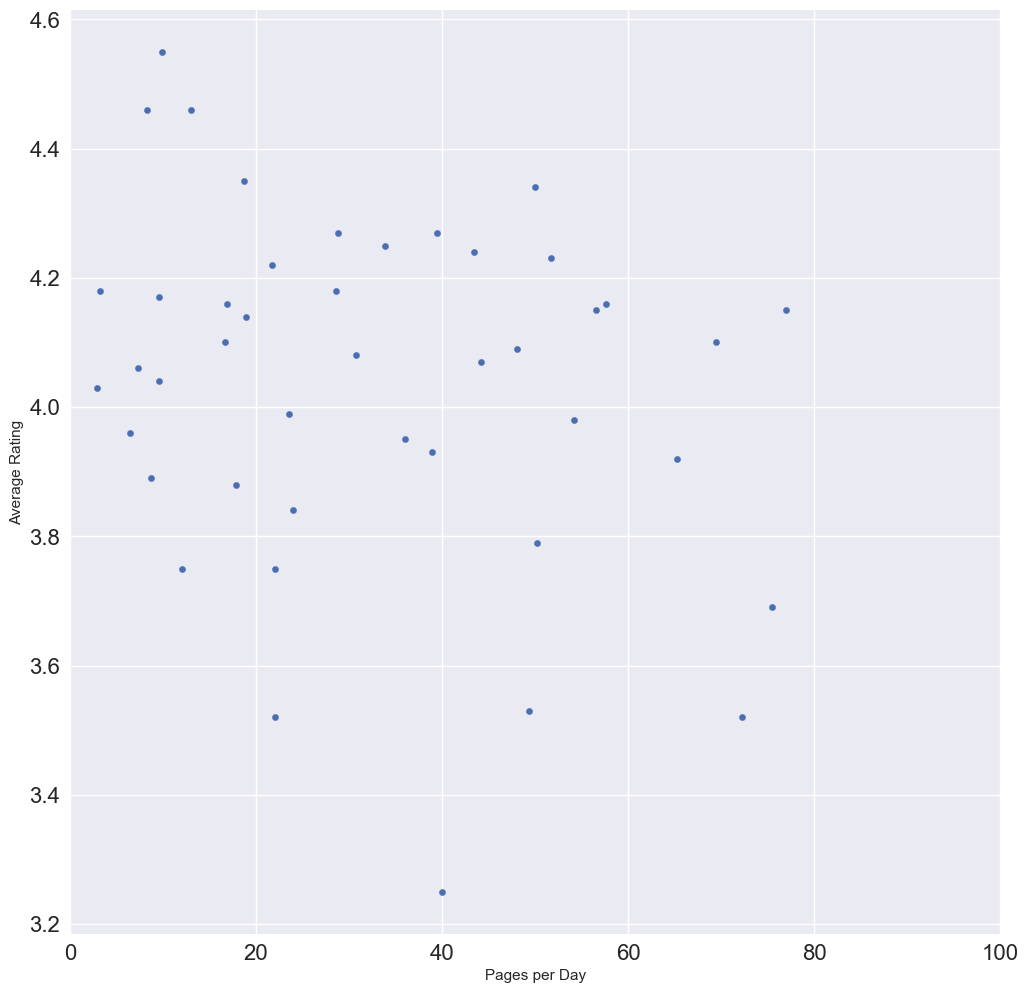

In [197]:
books_ = books[books['Finished'] == True]
# books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_.plot(kind='scatter',
                                                               x='Pages per Day',
                                                               y='Average Rating',
                                                               xlim=(0,100),
                                                               figsize=(12,12),
                                                               fontsize=16,
                                                               color='#4A6EB2')

### Publication Dates

In [198]:
books_ = books[books['Finished'] == True]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)
decade = 10 * (books['Original Publication Year'] // 10)
decade = decade.astype(int).astype(str) + 's'
decade.name = 'Decade'
published = books.groupby(decade).count()['Title']
published.name = 'Count'

all_years = list(range(books_['Original Publication Year'].min(), books_['Original Publication Year'].max() + 1))
all_decades = []
for y in all_years:
    decade = 10 * (y // 10)
    all_decades.append(decade)
all_decades = list(set(all_decades))
all_decades = [str(d) + 's' for d in sorted(all_decades)]

published = published.reindex(all_decades).fillna(0)

ax = published.plot(kind='bar',figsize=(18,8),fontsize=14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xlabel('Decade', fontsize=16);

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Some Stats
Average Number of Pages per Day over Year

In [199]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print('Average Number of Pages per Day over Year:', books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 50.546626078132924
